<a href="https://colab.research.google.com/github/karloxkronfeld/covid19/blob/master/mapaCovidColombia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files

In [ ]:
archivo=files.upload()

Saving cordenadas.csv to cordenadas.csv


In [ ]:
cord_colombia=pd.read_csv("cordenadas.csv")
cord_colombia=cord_colombia.iloc[:,[0,7,6]].reset_index(drop=True)
cord_colombia.columns=["codigo","lat","lon"]
cord_colombia=cord_colombia.groupby("codigo").mean().reset_index()

In [ ]:
latitudes={cord_colombia.codigo[i]:cord_colombia.lat[i] for i in range(len(cord_colombia))}
longitudes={cord_colombia.codigo[i]:cord_colombia.lon[i] for i in range(len(cord_colombia))}

In [ ]:
covid_colombia=pd.read_csv("https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD")
covid_colombia=covid_colombia.drop(36028,0).reset_index(drop=True)

In [ ]:
covid_colombia["latitud"]=covid_colombia['Código DIVIPOLA'].map(latitudes)
covid_colombia["longitud"]=covid_colombia['Código DIVIPOLA'].map(longitudes)

In [ ]:
covid_deptos=covid_colombia.iloc[:,[4,15,-4,-1,-2]]
covid_deptos.columns=["depto","fecha","codigo","lon","lat"]

In [ ]:
casos_depto=covid_deptos.groupby(["depto","codigo"])["fecha"].count().reset_index(name="casos")
casos_depto["lon"]=covid_deptos.groupby("depto")["lon"].mean().values
casos_depto["lat"]=covid_deptos.groupby("depto")["lat"].mean().values
casos_depto=casos_depto.sort_values("casos")

In [ ]:
!pip install geopandas

In [163]:
import geopandas as gpd
from pylab import *

In [191]:
geocol="https://gist.githubusercontent.com/john-guerra/43c7656821069d00dcbc/raw/3aadedf47badbdac823b00dbe259f6bc6d9e1899/colombia.geo.json"
geocol=gpd.read_file(geocol)
geocol.DPTO=geocol.DPTO.astype(int)

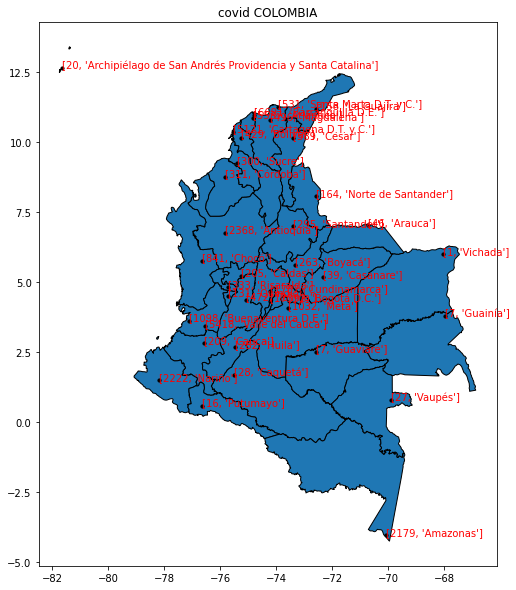

In [162]:
geocol.plot(figsize=(10,10),edgecolor="k")
scatter(casos_depto.lon,casos_depto.lat,s=10,c="k")
for i in range(len(casos_depto)):
  text(casos_depto.lon[i],casos_depto.lat[i],s=[casos_depto.casos[i],casos_depto.depto[i]],color="red")
title("covid COLOMBIA")
# axis("off")
show()

In [ ]:
casos={casos_depto.codigo[i]:casos_depto.casos[i] for i in range(len(casos_depto))}

In [192]:
geocol["casos"]=geocol.DPTO.map(casos)

In [ ]:
colormaps=dir(cm)

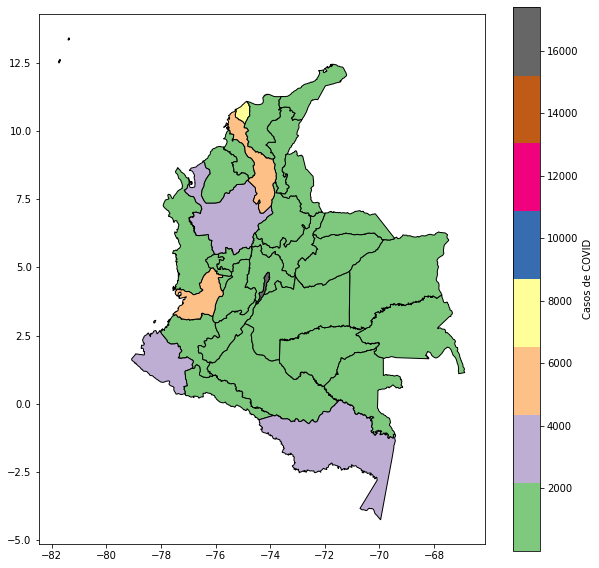

In [142]:
geocol.plot(figsize=(10,10),
            edgecolor="k",
            cmap=np.random.choice(colormaps),
            column="casos",
            legend=True,
            legend_kwds={"label":"Casos de COVID",
                 "orientation":"vertical"})

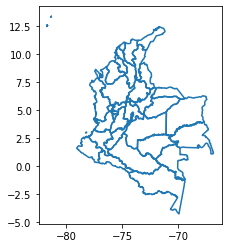

In [145]:
geocol.boundary.plot()

In [ ]:
pip install mapclassify

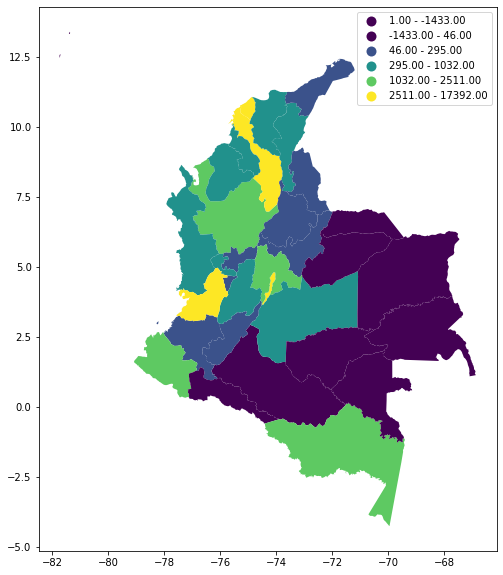

In [153]:
geocol.plot(figsize=(10,10),
            column="casos",
            scheme="boxplot",
            legend=True)

In [193]:
geocol=geocol.sort_values("casos",ascending=False).reset_index(drop=True)

In [194]:
geocol.loc[range(0,5),"casos"]=np.nan

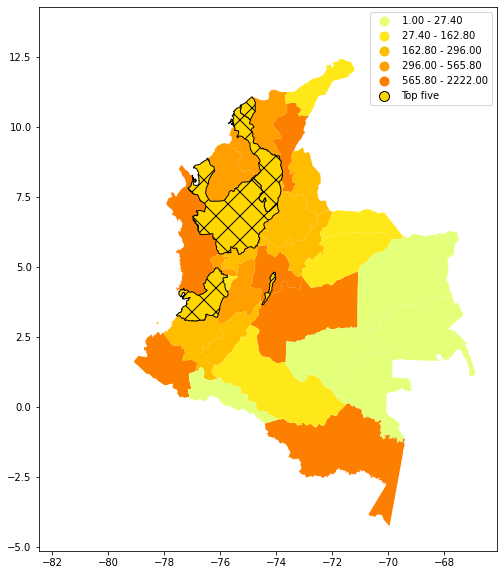

In [200]:
geocol.plot(figsize=(10,10),
            cmap=np.random.choice(dir(cm)),
            column="casos",
            legend=True,
            scheme="quantiles",
            missing_kwds={
        "color": "gold",
        "edgecolor": "black",
        "hatch": "/\\",
        "label": "Top five",})